In [1]:
#Problem statement: What variable(s) is highly correlated to the gross earning of movie?

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

#Read in data
df = pd.read_csv(r'C:\Users\samue\Downloads\movies.csv')

In [3]:
#View data
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

#display(df)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Check missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.2%}%'.format(col, pct_missing))

name - 0.00%%
rating - 1.00%%
genre - 0.00%%
year - 0.00%%
released - 0.03%%
score - 0.04%%
votes - 0.04%%
director - 0.00%%
writer - 0.04%%
star - 0.01%%
country - 0.04%%
budget - 28.31%%
gross - 2.46%%
company - 0.22%%
runtime - 0.05%%


In [5]:
#Drop missing data
df = df.dropna()

In [6]:
#Check data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#Change data types
#df['budget'] = df['budget'].astype('int64')
#df['gross'] = df['gross'].astype('int64')

In [8]:
#Create yearcorrect column 
df['yearcorrect'] = df['released'].astype(str).str.split(' ', expand=True)[2]

In [9]:
#Drop duplicate data
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020


In [10]:
#Sort DataFrame by gross column
df.sort_values(by=['gross'], ascending=False, inplace=True)

In [11]:
#Hypothesis: Score, votes and budget are higly correlated to the gross earning of movie.

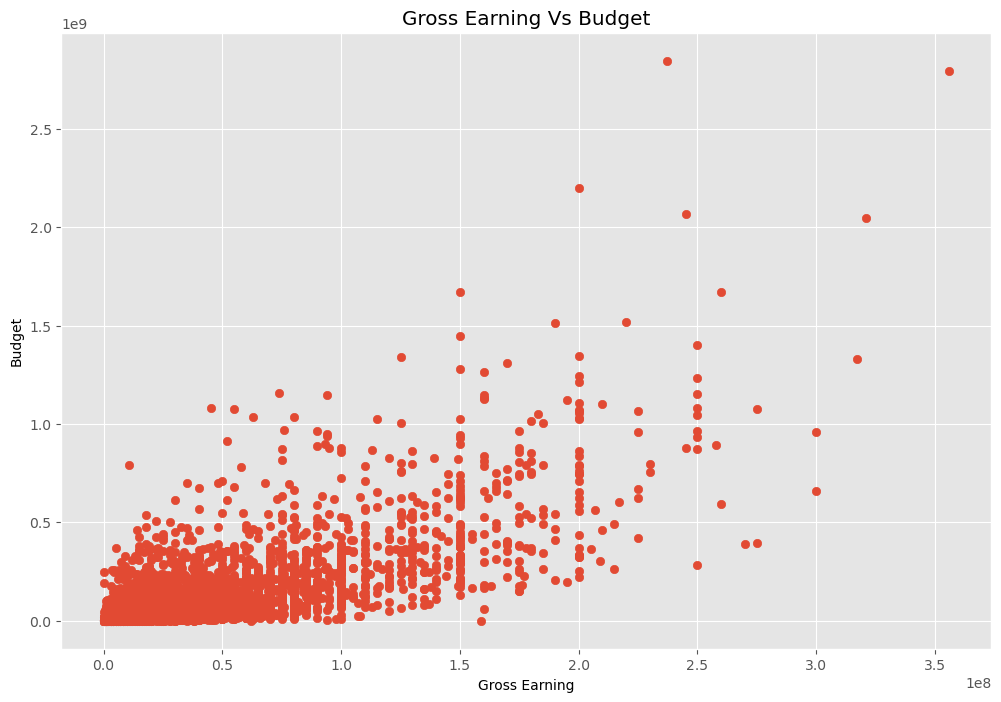

In [12]:
#Create scatter plot gross vs budget
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Gross Earning Vs Budget')
plt.xlabel('Gross Earning')
plt.ylabel('Budget')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

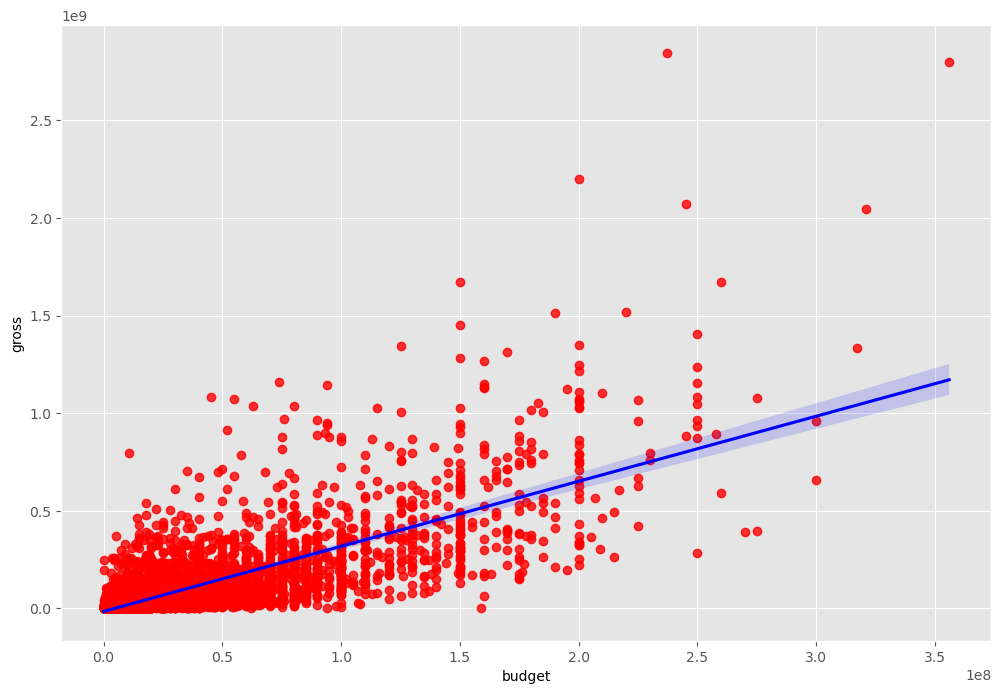

In [13]:
#Plot gross vs budget using seaborn
sns.regplot(data=df, x='budget', y='gross',  scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

C:\Users\samue\AppData\Local\Temp\ipykernel_20392\2823476395.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson') #pearson, kendall, spearman


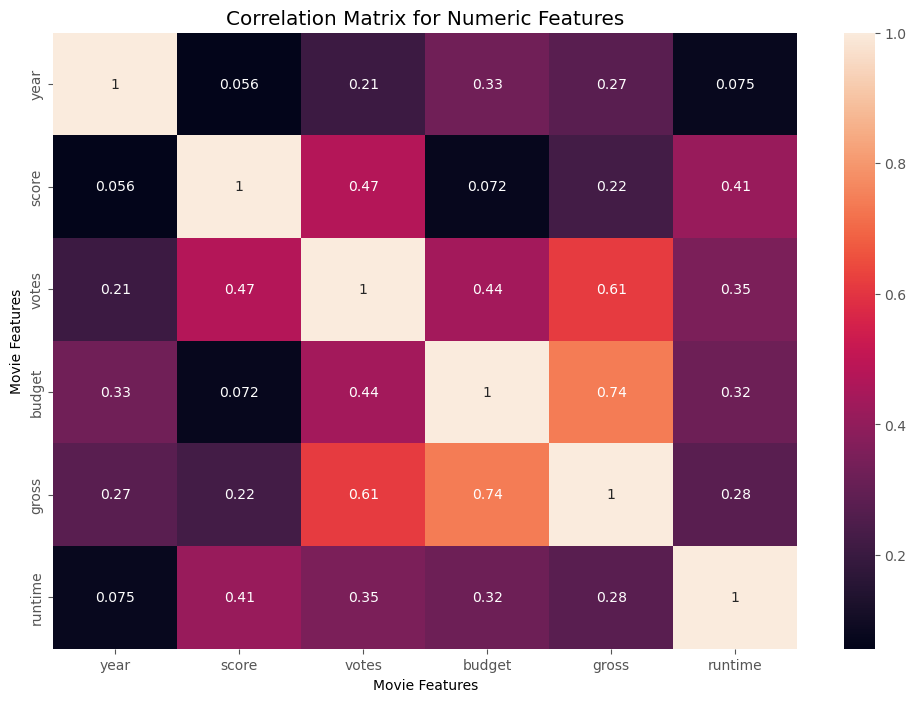

In [14]:
#Create correlation matrix between all numeric columns
correlation_matrix = df.corr(method='pearson') #pearson, kendall, spearman

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [15]:
corr_pairs = correlation_matrix.unstack()

corr_pairs

year     year       1.000000
         score      0.056386
         votes      0.206021
         budget     0.327722
         gross      0.274321
         runtime    0.075077
score    year       0.056386
         score      1.000000
         votes      0.474256
         budget     0.072001
         gross      0.222556
         runtime    0.414068
votes    year       0.206021
         score      0.474256
         votes      1.000000
         budget     0.439675
         gross      0.614751
         runtime    0.352303
budget   year       0.327722
         score      0.072001
         votes      0.439675
         budget     1.000000
         gross      0.740247
         runtime    0.318695
gross    year       0.274321
         score      0.222556
         votes      0.614751
         budget     0.740247
         gross      1.000000
         runtime    0.275796
runtime  year       0.075077
         score      0.414068
         votes      0.352303
         budget     0.318695
         gross

In [16]:
sorted_pairs = corr_pairs.sort_values(ascending=False)

sorted_pairs

year     year       1.000000
score    score      1.000000
gross    gross      1.000000
budget   budget     1.000000
votes    votes      1.000000
runtime  runtime    1.000000
gross    budget     0.740247
budget   gross      0.740247
gross    votes      0.614751
votes    gross      0.614751
score    votes      0.474256
votes    score      0.474256
budget   votes      0.439675
votes    budget     0.439675
runtime  score      0.414068
score    runtime    0.414068
runtime  votes      0.352303
votes    runtime    0.352303
year     budget     0.327722
budget   year       0.327722
         runtime    0.318695
runtime  budget     0.318695
gross    runtime    0.275796
runtime  gross      0.275796
gross    year       0.274321
year     gross      0.274321
gross    score      0.222556
score    gross      0.222556
votes    year       0.206021
year     votes      0.206021
         runtime    0.075077
runtime  year       0.075077
budget   score      0.072001
score    budget     0.072001
year     score

In [17]:
high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

year     year       1.000000
score    score      1.000000
gross    gross      1.000000
budget   budget     1.000000
votes    votes      1.000000
runtime  runtime    1.000000
gross    budget     0.740247
budget   gross      0.740247
gross    votes      0.614751
votes    gross      0.614751
dtype: float64

In [18]:
#Conclusion: Budget and votes are the top 2 variables higly correlated to the gross earning of movie.